# Title

## 1.0 Introduction

## 2.0 Data Description

### 2.1 Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt

## 3.0 Model Search Framework

## 4.0 Feature Engineering

## 5.0 Results

In [2]:
from src.s01_train_test_split import do_train_test_split

do_train_test_split()

Sampling Frequency = 5


### 5.1 Experiment 1

In [3]:
from src.s02_prepare_data import prepare_data
from src.s04_build_models import build_models

exp_yml_name = 'experiments/exp_01.yml'
prepare_data(exp_yml_name, training=True)
exp1_scores, exp1_top_scores = build_models(exp_yml_name)
print("Top 3 classifiers")
exp1_top_scores

Top 3 classifiers


,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
0,knn,none,none,100.0,100.0,1.0
1,random_forest,none,none,100.0,100.0,1.0
2,knn,min_max,none,99.99738096485254,99.99752940013836,0.999973809370695


### 5.2 Experiment 2

In [4]:
exp_yml_name = 'experiments/exp_02.yml'
prepare_data(exp_yml_name, training=True)
exp2_scores, exp2_top_scores = build_models(exp_yml_name)
print("Top 3 classifiers")
exp2_top_scores

Top 3 classifiers


,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
0,random_forest,standard_scalar,none,56.54793085385018,48.6838392728484,0.5246877056022392
1,knn,none,none,53.8108957569408,48.286852593996656,0.5343482773353966
2,gradboost,min_max,none,56.469355683603986,47.624158528862964,0.5391106776392328


### 5.3 Experiment 3

In [5]:
exp_yml_name = 'experiments/exp_03.yml'
prepare_data(exp_yml_name, training=True)
exp3_scores, exp3_top_scores = build_models(exp_yml_name)
print("Top 3 classifiers")
exp3_top_scores

Top 3 classifiers


,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
0,random_forest,min_max,none,48.0529697128622,43.25722809515686,0.4493202118288043
1,adaboost,min_max,pca,45.692933001180016,42.6272140709298,0.4275977618052473
2,gradboost,min_max,pca,46.112495083256846,42.342532911861305,0.44434970820119657


### 5.4 Experiment 4

In [6]:
exp_yml_name = 'experiments/exp_04.yml'
prepare_data(exp_yml_name, training=True)
exp4_scores, exp4_top_scores = build_models(exp_yml_name)
print("Top 3 classifiers")
exp4_top_scores

Top 3 classifiers


,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
0,random_forest,standard_scalar,isomap,17.46031746031746,28.88033019611967,0.19439393502187016
1,adaboost,standard_scalar,lle,17.46031746031746,28.663003663003668,0.1703493874546506
2,xgboost,none,lle,15.873015873015872,28.30502830502831,0.19296536796536792


### 5.5 Experiment 5

In [7]:
exp_yml_name = 'experiments/exp_05.yml'
prepare_data(exp_yml_name, training=True)
exp5_scores, exp5_top_scores = build_models(exp_yml_name)
print("Top 3 classifiers")
exp5_top_scores

Top 3 classifiers


,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
0,random_forest,none,isomap,22.22222222222222,33.699633699633694,0.22882877430807713
1,adaboost,min_max,none,14.814814814814813,26.520146520146522,0.15775630703166937
2,random_forest,standard_scalar,lle,14.814814814814813,26.167166167166165,0.13288207893471052


### 5.6 Comparison

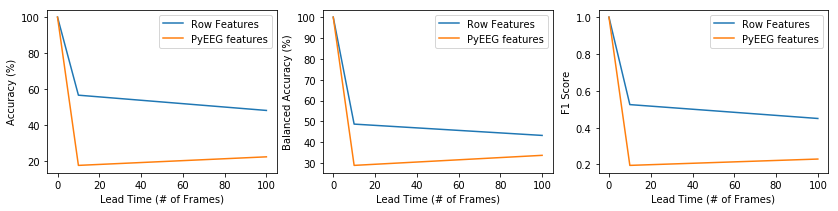

In [103]:
lead = [0, 10, 100]
lead_scores_acc = [exp1_top_scores.loc[0].accuracy, exp2_top_scores.loc[0].accuracy, exp3_top_scores.loc[0].accuracy]
lead_scores_feat_eng_acc = [exp1_top_scores.loc[0].accuracy, exp4_top_scores.loc[0].accuracy, exp5_top_scores.loc[0].accuracy]
lead_scores_bal_acc = [exp1_top_scores.loc[0].balanced_accuracy, exp2_top_scores.loc[0].balanced_accuracy, exp3_top_scores.loc[0].balanced_accuracy]
lead_scores_feat_eng_bal_acc = [exp1_top_scores.loc[0].balanced_accuracy, exp4_top_scores.loc[0].balanced_accuracy, exp5_top_scores.loc[0].balanced_accuracy]
lead_scores_f1 = [exp1_top_scores.loc[0].f1_score, exp2_top_scores.loc[0].f1_score, exp3_top_scores.loc[0].f1_score]
lead_scores_feat_eng_f1 = [exp1_top_scores.loc[0].f1_score, exp4_top_scores.loc[0].f1_score, exp5_top_scores.loc[0].f1_score]

lead_scores_acc = [float(v) for v in lead_scores_acc]
lead_scores_feat_eng_acc = [float(v) for v in lead_scores_feat_eng_acc]
lead_scores_bal_acc = [float(v) for v in lead_scores_bal_acc]
lead_scores_feat_eng_bal_acc = [float(v) for v in lead_scores_feat_eng_bal_acc]
lead_scores_f1 = [float(v) for v in lead_scores_f1]
lead_scores_feat_eng_f1 = [float(v) for v in lead_scores_feat_eng_f1]

fig1, axs1 = plt.subplots(1, 3, figsize=(14, 3))
axs1[0].plot(lead, lead_scores_acc, label='Row Features')
axs1[0].plot(lead, lead_scores_feat_eng_acc, label='PyEEG features')
axs1[0].set_label("Validation Accuracy")
axs1[0].set_ylabel("Accuracy (%)")
axs1[0].set_xlabel("Lead Time (# of Frames)")
axs1[0].legend()

axs1[1].plot(lead, lead_scores_bal_acc, label='Row Features')
axs1[1].plot(lead, lead_scores_feat_eng_bal_acc, label='PyEEG features')
axs1[1].set_label("Validation Balanced Accuracy")
axs1[1].set_xlabel("Lead Time (# of Frames)")
axs1[1].set_ylabel("Balanced Accuracy (%)")
axs1[1].legend()

axs1[2].plot(lead, lead_scores_f1, label='Row Features')
axs1[2].plot(lead, lead_scores_feat_eng_f1, label='PyEEG features')
axs1[2].set_label("Validation F1 Score")
axs1[2].set_ylabel("F1 Score")
axs1[2].set_xlabel("Lead Time (# of Frames)")
axs1[2].legend()
plt.show()

### 5.7 Test Results

In [65]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(
    y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues, return_cm=False,
):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    np.set_printoptions(precision=2)

    if not title:
        title = "Confusion matrix"

    # Compute confusion matrix

    cm = confusion_matrix(y_true, y_pred, labels=classes)


    # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        cm = np.nan_to_num(cm)
        print("Normalized confusion matrix")
    if return_cm:
        return cm

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation="nearest", cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        # ... and label them with the respective list entries
        xticklabels=classes,
        yticklabels=classes,
        title=title,
        ylabel="True label",
        xlabel="Predicted label",
    )

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(
                j,
                i,
                format(cm[i, j], fmt),
                ha="center",
                va="center",
                color="white" if cm[i, j] > thresh else "black",
            )
    fig.tight_layout()
    return ax

C:\Users\Vinay\Anaconda3_py37\envs\savorypy\lib\site-packages\sklearn\metrics\classification.py:1437: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\Vinay\Anaconda3_py37\envs\savorypy\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Test accuracy = 56.9%, balanced accuracy = 54.7%, F1 = 0.54


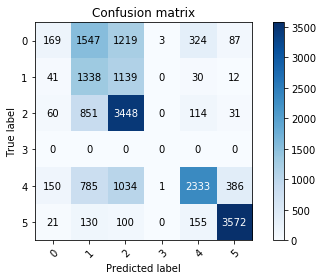

In [90]:
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
import numpy as np


exp_yml_name = 'experiments/exp_02.yml'
X_test, y_test = prepare_data(exp_yml_name, training=False)
model_path = 'output/exp2/random_forest_standard_scalar_none.pkl'
clf = joblib.load(model_path)
test_preds = clf.predict(X_test)
accuracy = round(accuracy_score(y_test, test_preds) * 100, 1)
bal_accuracy = round(balanced_accuracy_score(y_test, test_preds) * 100, 1)
f1 = round(f1_score(y_test, test_preds, average='weighted', labels=np.unique(test_preds)), 2)
res_str = ('Test accuracy = ' + str(accuracy) + '%, balanced accuracy = ' + str(bal_accuracy) 
           +'%, F1 = ' + str(f1))
print(res_str)

disp = plot_confusion_matrix(y_test, test_preds, classes=np.sort(np.unique(test_preds)))

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test[test_preds != 3], test_preds[test_preds != 3], np.sort(np.unique(test_preds))))

              precision    recall  f1-score   support

           0       0.38      0.05      0.09      3346
           1       0.29      0.52      0.37      2560
           2       0.50      0.77      0.60      4504
           3       0.00      0.00      0.00         0
           4       0.79      0.50      0.61      4688
           5       0.87      0.90      0.89      3978

   micro avg       0.57      0.57      0.57     19076
   macro avg       0.47      0.46      0.43     19076
weighted avg       0.60      0.57      0.54     19076



C:\Users\Vinay\Anaconda3_py37\envs\savorypy\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Vinay\Anaconda3_py37\envs\savorypy\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## 6.0 Conclusion

# Appendix

## A. Experiment 1

### A.1 Logistic Regression Results 

In [9]:
exp1_scores[exp1_scores.classifier == 'logistic'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
21,logistic,min_max,none,69.70300141427897,80.78367427611424,0.9310333181733133
22,logistic,min_max,pca,69.68728720339426,80.76885067694435,0.930797631758022
24,logistic,none,none,69.47776439159814,80.57120268801265,0.9258897787685004
19,logistic,none,pca,69.9780001047614,81.04308726158712,0.93335124537467
23,logistic,standard_scalar,none,69.63752553559269,80.72190927957307,0.9282745131251647
20,logistic,standard_scalar,pca,69.97538106961395,81.04061666172547,0.9333123556781132


### A.2 Naive Bayes Results 

In [10]:
exp1_scores[exp1_scores.classifier == 'naive_bayes'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
16,naive_bayes,min_max,none,72.2172751558326,83.15545014329479,0.9645616438222225
17,naive_bayes,min_max,pca,72.20679901524278,83.14556774384822,0.9644168129516069
6,naive_bayes,none,none,99.83500078571055,99.84435220871629,0.9983497698323407
7,naive_bayes,none,pca,99.83500078571055,99.84435220871629,0.9983497698323407
8,naive_bayes,standard_scalar,none,99.83500078571055,99.84435220871629,0.9983497698323407
9,naive_bayes,standard_scalar,pca,99.83500078571055,99.84435220871629,0.9983497698323407


### A.3 KNN Results

In [11]:
exp1_scores[exp1_scores.classifier == 'knn'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
4,knn,min_max,none,99.99738096485254,99.99752940013836,0.999973809370695
0,knn,none,none,100.0,100.0,1.0
5,knn,standard_scalar,none,99.99738096485254,99.99752940013836,0.999973809370695


### A.4 Random Forest Results

In [12]:
exp1_scores[exp1_scores.classifier == 'random_forest'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
2,random_forest,min_max,none,100.0,100.0,1.0
1,random_forest,none,none,100.0,100.0,1.0
3,random_forest,standard_scalar,none,100.0,100.0,1.0


### A.5 XGBoost Results

In [13]:
exp1_scores[exp1_scores.classifier == 'xgboost'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
11,xgboost,min_max,none,99.83500078571055,99.84435220871629,0.9983488783710699
10,xgboost,none,none,99.83500078571055,99.84435220871629,0.9983488783710699
12,xgboost,standard_scalar,none,99.83500078571055,99.84435220871629,0.9983488783710699


### A.6 Adaboost Results

In [14]:
exp1_scores[exp1_scores.classifier == 'adaboost'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
26,adaboost,min_max,none,45.306689015766594,50.0,0.7329299584042729
25,adaboost,none,none,45.306689015766594,50.0,0.7329299584042729
27,adaboost,standard_scalar,none,45.306689015766594,50.0,0.7329299584042729


### A.7 Gradboost Results

In [15]:
exp1_scores[exp1_scores.classifier == 'gradboost'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
14,gradboost,min_max,none,99.83500078571055,99.84435220871629,0.9983488783710699
13,gradboost,none,none,99.83500078571055,99.84435220871629,0.9983488783710699
15,gradboost,standard_scalar,none,99.83500078571055,99.84435220871629,0.9983488783710699


### A.8 SVC Results

In [16]:
exp1_scores[exp1_scores.classifier == 'svc'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
18,svc,standard_scalar,none,72.11251374993452,83.05662614882894,0.9631065123171474


## B. Experiment 2

### B.1 Logistic Regression Results 

In [17]:
exp2_scores[exp2_scores.classifier == 'logistic'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
21,logistic,min_max,none,38.01728653745416,43.91602777985874,0.3422594839183811
41,logistic,min_max,pca,24.9083289680461,26.892711679061847,0.3124586729437176
22,logistic,none,none,38.35777894185438,43.70478097539294,0.34280740321155095
42,logistic,none,pca,23.20586694604505,26.56905292491174,0.2086467072940699
24,logistic,standard_scalar,none,37.87323205866946,43.05130972530946,0.3183734432718636
40,logistic,standard_scalar,pca,24.751178627553692,27.307344284641815,0.3042426825898383


### B.2 Naive Bayes Results 

In [18]:
exp2_scores[exp2_scores.classifier == 'naive_bayes'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
31,naive_bayes,min_max,none,35.8171817705605,41.20150620021547,0.30607697883873924
39,naive_bayes,min_max,pca,29.91094814038764,34.6067027873326,0.3051852955557362
29,naive_bayes,none,none,35.8171817705605,41.21807207532612,0.3060589008839811
38,naive_bayes,none,pca,31.08957569408067,38.08842793289793,0.3511464380252824
30,naive_bayes,standard_scalar,none,35.8040859088528,41.20674961155801,0.30590789405588037
36,naive_bayes,standard_scalar,pca,34.31115767417496,39.50729742626392,0.274664655998251


### B.3 KNN Results

In [19]:
exp2_scores[exp2_scores.classifier == 'knn'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
5,knn,min_max,none,54.33473022524882,47.77605318197958,0.5401890034688107
19,knn,min_max,pca,53.94185437401781,44.9881665393091,0.534662334796836
3,knn,none,none,53.8108957569408,48.286852593996656,0.5343482773353966
25,knn,none,pca,52.22629649030907,42.3178752412007,0.5118651969216828
4,knn,standard_scalar,none,54.282346778418024,48.07285008347134,0.539003298403619
26,knn,standard_scalar,pca,53.01204819277109,41.762097149328184,0.5159819229280758


### B.4 Random Forest Results

In [20]:
exp2_scores[exp2_scores.classifier == 'random_forest'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
2,random_forest,min_max,none,56.54793085385018,48.414227385390134,0.5260681425178284
9,random_forest,min_max,pca,53.6930330015715,47.36666004929446,0.5329703047216525
1,random_forest,none,none,56.11576741749607,48.52094636667662,0.5222481048559067
10,random_forest,none,pca,54.649030906233634,47.095727763298626,0.5213191281749029
0,random_forest,standard_scalar,none,56.54793085385018,48.6838392728484,0.5246877056022392
20,random_forest,standard_scalar,pca,52.671555788370874,44.023902262061384,0.5169702984307353


### B.5 XGBoost Results

In [21]:
exp2_scores[exp2_scores.classifier == 'xgboost'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
12,xgboost,min_max,none,55.85385018334207,46.77420483292896,0.5257332567188542
17,xgboost,min_max,pca,51.61079099004715,45.60555345792564,0.5033254153196358
11,xgboost,none,none,55.85385018334207,46.77420483292896,0.5257332567188542
18,xgboost,none,pca,54.04662126767942,45.401376276538215,0.5190811710309627
13,xgboost,standard_scalar,none,55.85385018334207,46.77420483292896,0.5257332567188542
32,xgboost,standard_scalar,pca,49.51545311681509,41.1785977151577,0.46320017564610405


### B.6 Adaboost Results

In [22]:
exp2_scores[exp2_scores.classifier == 'adaboost'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
33,adaboost,min_max,none,52.86799371398638,40.95693951970845,0.49953325367335916
16,adaboost,min_max,pca,50.013095861707704,45.63920319282908,0.4859210717707671
28,adaboost,none,none,52.86799371398638,41.315845637112766,0.5001855534972656
23,adaboost,none,pca,52.57988475641697,43.5873896932647,0.4925686558867178
35,adaboost,standard_scalar,none,52.85489785227868,40.45017763459393,0.49321015958427683
37,adaboost,standard_scalar,pca,46.76532215819801,38.482952947999486,0.4374413145990173


### B.7 Gradboost Results

In [23]:
exp2_scores[exp2_scores.classifier == 'gradboost'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
6,gradboost,min_max,none,56.469355683603986,47.624158528862964,0.5391106776392328
14,gradboost,min_max,pca,53.32634887375589,46.211095693781196,0.5216208961342597
8,gradboost,none,none,56.36458878994238,47.58788547520575,0.5373389013189824
15,gradboost,none,pca,53.8108957569408,45.74015609001431,0.5215772975650368
7,gradboost,standard_scalar,none,56.351492928234684,47.60406275872815,0.5375965079537143
34,gradboost,standard_scalar,pca,50.1047668936616,40.816407724283856,0.4828794593377756


### B.8 SVC Results

In [24]:
exp2_scores[exp2_scores.classifier == 'svc'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
27,svc,standard_scalar,none,38.606600314300685,41.496906906090494,0.36775256287699104


## C. Experiment 3

### C.1 Logistic Regression Results 

In [25]:
exp3_scores[exp3_scores.classifier == 'logistic'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
30,logistic,min_max,none,32.81762160744723,37.16617823714403,0.35669605642080393
34,logistic,min_max,pca,29.35623443031336,34.68317575157289,0.24263922581468825
28,logistic,none,none,33.814081552379704,37.74904872241738,0.37115492327774313
42,logistic,none,pca,16.74314933787859,21.92728064960182,0.1546072104104606
24,logistic,standard_scalar,none,34.20742100432673,38.10682641911556,0.2924027214613716
41,logistic,standard_scalar,pca,23.705257637341028,24.84207345342421,0.18139177912368684


### C.2 Naive Bayes Results 

In [26]:
exp3_scores[exp3_scores.classifier == 'naive_bayes'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
31,naive_bayes,min_max,none,31.92605218303396,36.27105000296779,0.27112544591117455
36,naive_bayes,min_max,pca,31.02137144355579,34.43074756097828,0.2579321745304092
32,naive_bayes,none,none,31.79493903238495,36.22273980822121,0.27008494401914257
40,naive_bayes,none,pca,28.43844237577029,33.350646432388814,0.3174860590691927
33,naive_bayes,standard_scalar,none,31.768716402255148,36.10730720142948,0.26994984262691135
38,naive_bayes,standard_scalar,pca,30.66736593680346,33.728464945945305,0.4415215791444591


### C.3 KNN Results

In [27]:
exp3_scores[exp3_scores.classifier == 'knn'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
18,knn,min_max,none,47.004064507670115,40.594714417268065,0.4606713800025722
6,knn,min_max,pca,46.12560639832175,41.99523807465204,0.4540349189326988
39,knn,none,none,35.58410908614134,33.54839706912709,0.35174603428947204
21,knn,none,pca,45.96827061754294,39.563449082395024,0.45286276383730534
17,knn,standard_scalar,none,46.702504261177396,40.78670556093806,0.45686253047563785
37,knn,standard_scalar,pca,36.01678248328307,34.20239892495328,0.33970906738212364


### C.4 Random Forest Results

In [28]:
exp3_scores[exp3_scores.classifier == 'random_forest'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
0,random_forest,min_max,none,48.0529697128622,43.25722809515686,0.4493202118288043
10,random_forest,min_max,pca,45.77160089156943,41.74497947013357,0.4523800048165273
2,random_forest,none,none,47.67274157598007,43.00029726895019,0.4664424297514885
13,random_forest,none,pca,47.20073423364363,41.63779538736151,0.4468652395736814
1,random_forest,standard_scalar,none,47.449849219876754,43.062359479183044,0.46477452689314463
25,random_forest,standard_scalar,pca,45.53559722040121,37.99917539312185,0.4424570457572574


### C.5 XGBoost Results

In [29]:
exp3_scores[exp3_scores.classifier == 'xgboost'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
14,xgboost,min_max,none,48.99698439753507,41.636508791756825,0.45781899203490706
8,xgboost,min_max,pca,46.09938376819195,41.8719148611884,0.4396195502974108
11,xgboost,none,none,49.08876360298938,41.73684805108467,0.4584279713725761
16,xgboost,none,pca,46.584502425593286,40.981071095760605,0.44087543091514814
12,xgboost,standard_scalar,none,49.08876360298938,41.73684805108467,0.4584279713725761
22,xgboost,standard_scalar,pca,46.21738560377606,39.157396401197914,0.4410011607319443


### C.6 Adaboost Results

In [30]:
exp3_scores[exp3_scores.classifier == 'adaboost'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
29,adaboost,min_max,none,44.43424675494952,37.70928902154775,0.4278417472417462
3,adaboost,min_max,pca,45.692933001180016,42.6272140709298,0.4275977618052473
26,adaboost,none,none,45.14225776845417,37.847387529837526,0.4320123546229326
19,adaboost,none,pca,47.98741313753769,40.3053322318319,0.4414927560653597
27,adaboost,standard_scalar,none,45.14225776845417,37.847387529837526,0.4320123546229326
35,adaboost,standard_scalar,pca,43.38534154975744,34.50092981494985,0.3950167600845065


### C.7 Gradboost Results

In [31]:
exp3_scores[exp3_scores.classifier == 'gradboost'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
7,gradboost,min_max,none,48.931427822210566,41.885224881575105,0.4526032705688334
4,gradboost,min_max,pca,46.112495083256846,42.342532911861305,0.44434970820119657
9,gradboost,none,none,49.03631834272977,41.85293652700697,0.4535638654070283
15,gradboost,none,pca,46.7418382063721,41.19960046538978,0.44319195046556104
5,gradboost,standard_scalar,none,49.403435164547005,42.2819928172707,0.458769751839472
20,gradboost,standard_scalar,pca,46.54516848039859,39.60754680708558,0.44572553735268094


### C.8 SVC Results

In [32]:
exp3_scores[exp3_scores.classifier == 'svc'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
23,svc,standard_scalar,none,35.78077881211485,38.74425104622225,0.3428335572131292


## D. Experiment 4

### D.1 Logistic Regression Results 

In [33]:
exp4_scores[exp4_scores.classifier == 'logistic'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
83,logistic,min_max,isomap,9.523809523809524,7.6923076923076925,0.15491559086395235
30,logistic,min_max,kpca,19.047619047619047,15.384615384615385,0.2971428571428571
99,logistic,min_max,lle,7.936507936507936,6.318681318681318,0.08465274213290165
6,logistic,min_max,none,6.349206349206349,20.421245421245423,0.08248072119039862
51,logistic,min_max,pca,14.285714285714285,11.446886446886447,0.14077041602465332
101,logistic,none,isomap,7.936507936507936,5.600539811066127,0.13596491228070176
12,logistic,none,kpca,20.634920634920633,16.666666666666664,0.34210526315789475
44,logistic,none,lle,15.873015873015872,12.820512820512823,0.11096884336320956
11,logistic,none,none,19.047619047619047,16.72608093660725,0.20177422809001758
65,logistic,none,pca,12.698412698412698,10.073260073260075,0.12350545263434501


### D.2 Naive Bayes Results 

In [34]:
exp4_scores[exp4_scores.classifier == 'naive_bayes'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
50,naive_bayes,min_max,isomap,14.285714285714285,11.538461538461538,0.10743801652892564
52,naive_bayes,min_max,kpca,14.285714285714285,11.446886446886447,0.13946505471929202
27,naive_bayes,min_max,lle,28.57142857142857,15.789473684210526,0.2671875
8,naive_bayes,min_max,none,22.22222222222222,17.513626724153042,0.1917109945205679
55,naive_bayes,min_max,pca,12.698412698412698,10.539460539460539,0.17250938430340423
33,naive_bayes,none,isomap,19.047619047619047,14.888181993445151,0.15119909988495722
13,naive_bayes,none,kpca,17.46031746031746,16.666666666666664,0.29729729729729726
91,naive_bayes,none,lle,9.523809523809524,7.287449392712551,0.06361864256601099
41,naive_bayes,none,none,17.46031746031746,13.606130711393869,0.13971796983631046
47,naive_bayes,none,pca,15.873015873015872,12.454212454212454,0.1135060814383924


### D.3 KNN Results

In [35]:
exp4_scores[exp4_scores.classifier == 'knn'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
61,knn,min_max,isomap,12.698412698412698,10.356310356310356,0.15353535353535352
40,knn,min_max,kpca,17.46031746031746,13.656080761343917,0.15403573115501096
72,knn,min_max,none,11.11111111111111,9.17722628248944,0.11751761636554263
34,knn,min_max,pca,19.047619047619047,14.372907793960424,0.2017123162903214
42,knn,none,isomap,17.46031746031746,13.404139719929194,0.19835019274009452
14,knn,none,kpca,20.634920634920633,16.666666666666664,0.34210526315789475
76,knn,none,lle,11.11111111111111,8.932733932733933,0.11033005794910557
26,knn,none,none,20.634920634920633,15.796484217536852,0.22956818569721796
48,knn,none,pca,15.873015873015872,11.827646038172356,0.14802379733255314
66,knn,standard_scalar,isomap,12.698412698412698,9.993077098340256,0.11928423543330377


### D.4 Random Forest Results

In [36]:
exp4_scores[exp4_scores.classifier == 'random_forest'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
86,random_forest,min_max,isomap,9.523809523809524,7.600732600732601,0.09228989401403194
32,random_forest,min_max,kpca,19.047619047619047,14.926739926739927,0.2530365211623762
4,random_forest,min_max,lle,19.047619047619047,21.496836496836494,0.22942145237541656
53,random_forest,min_max,none,14.285714285714285,11.313686313686315,0.16841630591630594
20,random_forest,min_max,pca,20.634920634920633,16.3003663003663,0.2537878787878788
64,random_forest,none,isomap,12.698412698412698,10.084652189915348,0.10965719621181808
15,random_forest,none,kpca,20.634920634920633,16.666666666666664,0.34210526315789475
80,random_forest,none,lle,11.11111111111111,8.539267749794066,0.13910487437057487
71,random_forest,none,none,11.11111111111111,9.34898434898435,0.13578971533516987
95,random_forest,none,pca,7.936507936507936,6.4102564102564115,0.06885593220338983


### D.5 XGBoost Results

In [37]:
exp4_scores[exp4_scores.classifier == 'xgboost'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
56,xgboost,min_max,isomap,12.698412698412698,10.539460539460539,0.16964472309299897
39,xgboost,min_max,kpca,17.46031746031746,13.736263736263735,0.17106081333167517
97,xgboost,min_max,none,9.523809523809524,6.386157701947176,0.11375134669252315
19,xgboost,min_max,pca,20.634920634920633,16.533466533466534,0.22544500953591864
78,xgboost,none,isomap,11.11111111111111,8.791208791208792,0.13226010101010102
16,xgboost,none,kpca,1.5873015873015872,16.666666666666664,0.03125
2,xgboost,none,lle,15.873015873015872,28.30502830502831,0.19296536796536792
96,xgboost,none,none,9.523809523809524,6.386157701947176,0.11375134669252315
63,xgboost,none,pca,12.698412698412698,10.214785214785216,0.17348484848484846
3,xgboost,standard_scalar,isomap,11.11111111111111,24.500499500499497,0.11962809917355371


### D.6 Adaboost Results

In [38]:
exp4_scores[exp4_scores.classifier == 'adaboost'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
68,adaboost,min_max,isomap,14.285714285714285,9.82745324850588,0.15010751656714388
24,adaboost,min_max,kpca,19.047619047619047,15.9007659007659,0.15366591080876796
37,adaboost,min_max,lle,17.46031746031746,14.11088911088911,0.2517439793832756
59,adaboost,min_max,none,12.698412698412698,10.447885447885447,0.12407629718554086
70,adaboost,min_max,pca,12.698412698412698,9.405068615594931,0.13122670276861212
69,adaboost,none,isomap,12.698412698412698,9.679793890320205,0.13406445406445405
17,adaboost,none,kpca,20.634920634920633,16.666666666666664,0.34210526315789475
62,adaboost,none,lle,12.698412698412698,10.22617733144049,0.11935553168635875
58,adaboost,none,none,12.698412698412698,10.447885447885447,0.12407629718554086
93,adaboost,none,pca,9.523809523809524,6.921149026412183,0.1181554747502866


### D.7 Gradboost Results

In [39]:
exp4_scores[exp4_scores.classifier == 'gradboost'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
92,gradboost,min_max,isomap,9.523809523809524,7.012724117987276,0.10261022927689593
22,gradboost,min_max,kpca,20.634920634920633,16.208791208791208,0.21519340874179582
31,gradboost,min_max,lle,15.873015873015872,15.246420246420248,0.18204602415128732
89,gradboost,min_max,none,9.523809523809524,7.348791559317876,0.11708117590470533
46,gradboost,min_max,pca,15.873015873015872,12.728937728937728,0.12067613146129107
67,gradboost,none,isomap,12.698412698412698,9.851551956815115,0.12319109461966606
18,gradboost,none,kpca,20.634920634920633,16.666666666666664,0.34210526315789475
94,gradboost,none,lle,9.523809523809524,6.791016001542317,0.11023090526196117
88,gradboost,none,none,9.523809523809524,7.348791559317876,0.11708117590470533
103,gradboost,none,pca,4.761904761904762,3.8461538461538463,0.05138339920948618


### D.8 SVC Results

In [40]:
exp4_scores[exp4_scores.classifier == 'svc'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
36,svc,standard_scalar,none,17.46031746031746,14.13367334419966,0.19515243134290755


## E. Experiment 5

### E.1 Logistic Regression Results 

In [41]:
exp5_scores[exp5_scores.classifier == 'logistic'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
47,logistic,min_max,isomap,16.666666666666664,13.58974358974359,0.14583333333333331
18,logistic,min_max,kpca,24.074074074074073,16.666666666666664,0.3880597014925373
19,logistic,min_max,lle,24.074074074074073,16.666666666666664,0.3880597014925373
99,logistic,min_max,none,9.25925925925926,7.179487179487181,0.09444444444444446
88,logistic,min_max,pca,9.25925925925926,8.846153846153848,0.07530364372469636
42,logistic,none,isomap,14.814814814814813,14.358974358974361,0.13498622589531678
16,logistic,none,kpca,24.074074074074073,16.666666666666664,0.3880597014925373
17,logistic,none,lle,24.074074074074073,16.666666666666664,0.3880597014925373
78,logistic,none,none,14.814814814814813,10.457875457875458,0.13689447022780357
92,logistic,none,pca,11.11111111111111,8.41991341991342,0.13637226970560304


### E.2 Naive Bayes Results 

In [42]:
exp5_scores[exp5_scores.classifier == 'naive_bayes'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
77,naive_bayes,min_max,isomap,12.962962962962962,11.025641025641027,0.14518229166666669
57,naive_bayes,min_max,kpca,14.814814814814813,12.307692307692308,0.10566420014094434
21,naive_bayes,min_max,lle,24.074074074074073,16.666666666666664,0.3880597014925373
79,naive_bayes,min_max,none,9.25925925925926,10.32967032967033,0.10236879666227493
91,naive_bayes,min_max,pca,9.25925925925926,8.46153846153846,0.1103197877391426
95,naive_bayes,none,isomap,5.555555555555555,7.94871794871795,0.06004901960784313
20,naive_bayes,none,kpca,18.51851851851852,16.666666666666664,0.3125
38,naive_bayes,none,lle,18.51851851851852,14.871794871794872,0.26973684210526316
50,naive_bayes,none,none,12.962962962962962,12.71062271062271,0.18937389770723106
64,naive_bayes,none,pca,14.814814814814813,12.082917082917083,0.17865418894830662


### E.3 KNN Results

In [43]:
exp5_scores[exp5_scores.classifier == 'knn'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
11,knn,min_max,isomap,22.22222222222222,18.223443223443223,0.2269426289034132
6,knn,min_max,kpca,22.22222222222222,20.183150183150186,0.26492368061055516
104,knn,min_max,lle,7.4074074074074066,4.945054945054945,0.08751714677640604
73,knn,min_max,none,14.814814814814813,11.428571428571429,0.1471121471121471
46,knn,min_max,pca,16.666666666666664,13.84115884115884,0.17149178197038203
9,knn,none,isomap,25.925925925925924,19.02930402930403,0.26780921708457944
22,knn,none,kpca,24.074074074074073,16.666666666666664,0.3880597014925373
48,knn,none,lle,14.814814814814813,13.126873126873129,0.15748243302591125
4,knn,none,none,27.77777777777778,22.655677655677657,0.25476646597336255
37,knn,none,pca,18.51851851851852,14.921744921744923,0.16730831708901886


### E.4 Random Forest Results

In [44]:
exp5_scores[exp5_scores.classifier == 'random_forest'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
75,random_forest,min_max,isomap,12.962962962962962,11.41025641025641,0.13931804629479047
100,random_forest,min_max,kpca,9.25925925925926,6.7032967032967035,0.12130165027645295
31,random_forest,min_max,lle,18.51851851851852,16.025641025641026,0.19916943521594682
60,random_forest,min_max,none,12.962962962962962,12.17948717948718,0.15886439142253098
83,random_forest,min_max,pca,11.11111111111111,10.12820512820513,0.13197837274444665
0,random_forest,none,isomap,22.22222222222222,33.699633699633694,0.22882877430807713
23,random_forest,none,kpca,24.074074074074073,16.666666666666664,0.3880597014925373
30,random_forest,none,lle,18.51851851851852,16.10722610722611,0.1781958144942363
59,random_forest,none,none,12.962962962962962,12.17948717948718,0.14383918550585215
15,random_forest,none,pca,22.22222222222222,17.577422577422578,0.1730964750572594


### E.5 XGBoost Results

In [45]:
exp5_scores[exp5_scores.classifier == 'xgboost'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
14,xgboost,min_max,isomap,18.51851851851852,17.692307692307697,0.2130837912087912
82,xgboost,min_max,kpca,11.11111111111111,10.178155178155178,0.1261797872908984
7,xgboost,min_max,lle,24.074074074074073,19.976689976689975,0.1869178440607012
62,xgboost,min_max,none,14.814814814814813,12.087912087912088,0.15701459034792367
94,xgboost,min_max,pca,11.11111111111111,8.126873126873129,0.15182764463810214
3,xgboost,none,isomap,27.77777777777778,23.16350316350316,0.30147396327951886
24,xgboost,none,kpca,18.51851851851852,16.666666666666664,0.3125
41,xgboost,none,lle,16.666666666666664,14.733599733599734,0.17540547083030744
61,xgboost,none,none,14.814814814814813,12.087912087912088,0.15701459034792367
12,xgboost,none,pca,22.22222222222222,17.87046287046287,0.21134014859505057


### E.6 Adaboost Results

In [46]:
exp5_scores[exp5_scores.classifier == 'adaboost'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
87,adaboost,min_max,isomap,12.962962962962962,9.56043956043956,0.16594045025417575
69,adaboost,min_max,kpca,12.962962962962962,11.551781551781554,0.14265948222469962
86,adaboost,min_max,lle,12.962962962962962,9.652014652014653,0.13010778561336617
1,adaboost,min_max,none,14.814814814814813,26.520146520146522,0.15775630703166937
56,adaboost,min_max,pca,12.962962962962962,12.472527472527473,0.11109864072827035
58,adaboost,none,isomap,16.666666666666664,12.206127206127208,0.1693562610229277
25,adaboost,none,kpca,18.51851851851852,16.666666666666664,0.3125
53,adaboost,none,lle,14.814814814814813,12.6007326007326,0.14050863447793271
33,adaboost,none,none,16.666666666666664,15.8974358974359,0.13324420677361853
43,adaboost,none,pca,16.666666666666664,14.207459207459209,0.14660938190349956


### E.7 Gradboost Results

In [47]:
exp5_scores[exp5_scores.classifier == 'gradboost'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
45,gradboost,min_max,isomap,20.37037037037037,14.102564102564102,0.18571428571428572
102,gradboost,min_max,kpca,5.555555555555555,5.8058608058608066,0.05615196516967854
93,gradboost,min_max,lle,11.11111111111111,8.21844821844822,0.12859477124183008
71,gradboost,min_max,none,16.666666666666664,11.538461538461538,0.19897959183673472
68,gradboost,min_max,pca,12.962962962962962,11.794871794871796,0.13019079685746357
5,gradboost,none,isomap,25.925925925925924,20.311355311355314,0.29000536768652707
26,gradboost,none,kpca,24.074074074074073,16.666666666666664,0.3880597014925373
54,gradboost,none,lle,12.962962962962962,12.564102564102567,0.11980920314253647
70,gradboost,none,none,16.666666666666664,11.538461538461538,0.19897959183673472
44,gradboost,none,pca,16.666666666666664,14.115884115884118,0.17175475399026166


### E.8 SVC Results

In [48]:
exp5_scores[exp5_scores.classifier == 'svc'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
55,svc,standard_scalar,none,12.962962962962962,12.564102564102567,0.11686369540775672
